In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# df = pd.read_csv('../experiments/sw-data/sigmax.csv')
df = pd.read_csv('../experiments/sw-data/sigmax.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
9,ANTLR4,NaN,False,1,7271551,134217732,87258604,23.004800,5.834336e+06
3,RapidJSON,DOM,False,1,7271551,134217732,87258604,0.996836,1.346437e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,87258604,0.860884,1.559069e+08
5,RapidJSON,SAX,False,1,7271551,134217732,87258604,0.513005,2.616305e+08
0,simdjson,DOM,False,1,7271551,134217732,87258604,0.496434,2.703637e+08
1,simdjson,DOM,True,1,7271551,134217732,87258604,0.449033,2.989039e+08
6,RapidJSON,SAX,True,1,7271551,134217732,87258604,0.438061,3.063905e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,87258604,0.437998,3.064346e+08
10,Boost Spirit.X3,NaN,False,1,7271551,134217732,87258604,0.234804,5.716160e+08
8,Custom,NaN,False,1,7271551,134217732,87258604,0.125908,1.065998e+09


In [11]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 87258604            0.005834
                2          134217737 103798904           0.005817
                4          134217740 128303440           0.005625
                8          134217764 157861596           0.005070
                16         134217768 186337836           0.004968
                32         134217827 208512692           0.004691
                64         134217903 223034756           0.004604
                128        134217816 231471012           0.004668
                256        134218013 236026080           0.004541
Boost Spirit.X3 1          134217732 87258604            0.571616
                2          134217737 103798904           0.462769
                4          134217740 128303440           0.412816
                8          134217764 157861596           0.340644
                16         134217768 186337836           0.294508
                32         134217827 208512692           0.309988
                64         134217903 223034756           0.302513
                128        134217816 231471012           0.298359
                256        134218013 236026080           0.296382
Custom          1          134217732 87258604            1.554414
                2          134217737 103798904           0.995673
                4          134217740 128303440           0.768443
                8          134217764 157861596           0.639592
                16         134217768 186337836           0.548717
                32         134217827 208512692           0.527766
                64         134217903 223034756           0.497618
                128        134217816 231471012           0.482954
                256        134218013 236026080           0.472743
RapidJSON       1          134217732 87258604            0.306391
                2          134217737 103798904           0.284923
                4          134217740 128303440           0.272192
                8          134217764 157861596           0.266344
                16         134217768 186337836           0.261282
                32         134217827 208512692           0.265397
                64         134217903 223034756           0.272234
                128        134217816 231471012           0.272723
                256        134218013 236026080           0.268002
simdjson        1          134217732 87258604            0.306435
                2          134217737 103798904           0.300010
                4          134217740 128303440           0.283320
                8          134217764 157861596           0.265199
                16         134217768 186337836           0.264271
                32         134217827 208512692           0.259509
                64         134217903 223034756           0.264747
                128        134217816 231471012           0.263436
                256        134218013 236026080           0.251292

In [12]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,87258604,0.005834,0.571616,1.554414,0.306391,0.306435
2,134217737,103798904,0.005817,0.462769,0.995673,0.284923,0.300010
4,134217740,128303440,0.005625,0.412816,0.768443,0.272192,0.283320
8,134217764,157861596,0.005070,0.340644,0.639592,0.266344,0.265199
16,134217768,186337836,0.004968,0.294508,0.548717,0.261282,0.264271
32,134217827,208512692,0.004691,0.309988,0.527766,0.265397,0.259509
64,134217903,223034756,0.004604,0.302513,0.497618,0.272234,0.264747
128,134217816,231471012,0.004668,0.298359,0.482954,0.272723,0.263436
256,134218013,236026080,0.004541,0.296382,0.472743,0.268002,0.251292


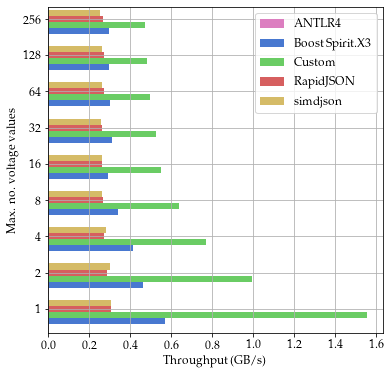

In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)

fig.savefig('software.pdf')